In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

df = pd.read_csv("animal_sentiments_data.csv")

In [2]:
review_df = df[['Item','animal_sentiments']]

print(review_df.shape)
review_df.head(5)

(979, 2)


,Item,animal_sentiments
0,Asses,non-ruminant
1,Asses,non-ruminant
2,Asses,non-ruminant
3,Asses,non-ruminant
4,Asses,non-ruminant


In [3]:
review_df["animal_sentiments"].value_counts()

non-ruminant    684
ruminant        295
Name: animal_sentiments, dtype: int64

In [4]:
sentiment_label = review_df.animal_sentiments.factorize()
# sentiment_label

In [5]:
tweet = review_df.Item.values

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [7]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           896       
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 17,547
Trainable params: 17,547
Non-trainable params: 0
____________________________________________________

In [10]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.3, epochs=30, batch_size=32)

Epoch 1/30
22/22 [==============================] - 9s 259ms/step - loss: 0.6501 - accuracy: 0.6891 - val_loss: 0.6138 - val_accuracy: 0.6939
Epoch 2/30
22/22 [==============================] - 5s 242ms/step - loss: 0.5894 - accuracy: 0.7007 - val_loss: 0.5711 - val_accuracy: 0.6939
Epoch 3/30
22/22 [==============================] - 5s 240ms/step - loss: 0.5381 - accuracy: 0.7022 - val_loss: 0.4855 - val_accuracy: 0.6939
Epoch 4/30
22/22 [==============================] - 5s 242ms/step - loss: 0.4150 - accuracy: 0.7372 - val_loss: 0.3302 - val_accuracy: 1.0000
Epoch 5/30
22/22 [==============================] - 5s 243ms/step - loss: 0.2658 - accuracy: 0.9650 - val_loss: 0.1512 - val_accuracy: 1.0000
Epoch 6/30
22/22 [==============================] - 5s 243ms/step - loss: 0.1275 - accuracy: 0.9956 - val_loss: 0.0655 - val_accuracy: 1.0000
Epoch 7/30
22/22 [==============================] - 5s 241ms/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 

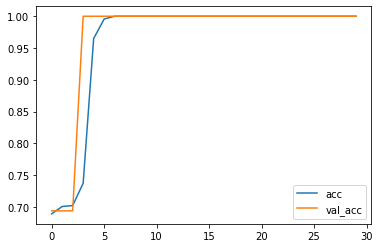

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

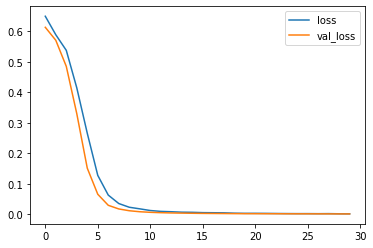

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [13]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])



In [25]:

test_sentence1 = "buffalo"
predict_sentiment(test_sentence1)

test_sentence2 = "snake"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 47ms/step
Predicted label:  ruminant
1/1 [==============================] - 0s 67ms/step
Predicted label:  ruminant
